# Brands Sentiment 

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")
# from plotnine import *
import re
import datetime 

import matplotlib as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\hs324\\OneDrive\\Desktop\\Class_Files\\06_2022Fall\\04_Practicum\\Quantilope_Core\\data\\sentiment_score_text.csv',index_col=[0] )
df.head()

,roberta_neg,roberta_neu,roberta_pos,text
0,0.008735,0.933111,0.058154,Adidas Titans-John Ramsey launches a double to...
1,0.754109,0.226748,0.019143,Just never buy adidas shoes anymore
2,0.002987,0.030440,0.966573,"I like Adidas, nice company."
3,0.273377,0.604013,0.122610,As an unbiased youth sports fan. I am once aga...
4,0.010831,0.881206,0.107964,2 and a half hours until adidas sandals August


In [3]:
# Since the sentiments adds up to 1, only need to choose the highest as the sentiment of this text. 
df.rename(columns = {'roberta_neg':'neg','roberta_neu':'neu','roberta_pos':'pos' },inplace = True )
df['sentiment'] = df[['neg','neu','pos']].idxmax(axis=1)
df

,neg,neu,pos,text,sentiment
0,0.008735,0.933111,0.058154,Adidas Titans-John Ramsey launches a double to...,neu
1,0.754109,0.226748,0.019143,Just never buy adidas shoes anymore,neg
2,0.002987,0.030440,0.966573,"I like Adidas, nice company.",pos
3,0.273377,0.604013,0.122610,As an unbiased youth sports fan. I am once aga...,neu
4,0.010831,0.881206,0.107964,2 and a half hours until adidas sandals August,neu
...,...,...,...,...,...
16258,0.271126,0.685823,0.043051,Drinking The Paoli Massacre by Artillery Brew...,neu
16259,0.732503,0.235738,0.031759,"I met a boy wearing Vans, 501's\nAnd a dope Be...",neg
16260,0.105189,0.794907,0.099904,@InaGaddaDeVida Look at vans stack forms! http...,neu
16261,0.002211,0.015109,0.982680,@vans X @waltdisneyworld 👟\n✨ I got the opport...,pos


In [4]:
brands = ['Nike','Adidas','New Balance','Converse','Reebok']

In [5]:
for brand in brands:
    print(brand + ":" + str(df[df['text'].str.contains(brand, case = False, na = False)].shape[0]))

Nike:8758
Adidas:2886
New Balance:448
Converse:1016
Reebok:377


In [6]:
# create column with brand names 
for brand in brands:
    df.loc[lambda x : x.text.str.lower().str.contains(brand.lower()), 'brand'] = brand.capitalize()
df 

,neg,neu,pos,text,sentiment,brand
0,0.008735,0.933111,0.058154,Adidas Titans-John Ramsey launches a double to...,neu,Adidas
1,0.754109,0.226748,0.019143,Just never buy adidas shoes anymore,neg,Adidas
2,0.002987,0.030440,0.966573,"I like Adidas, nice company.",pos,Adidas
3,0.273377,0.604013,0.122610,As an unbiased youth sports fan. I am once aga...,neu,Adidas
4,0.010831,0.881206,0.107964,2 and a half hours until adidas sandals August,neu,Adidas
...,...,...,...,...,...,...
16258,0.271126,0.685823,0.043051,Drinking The Paoli Massacre by Artillery Brew...,neu,NaN
16259,0.732503,0.235738,0.031759,"I met a boy wearing Vans, 501's\nAnd a dope Be...",neg,NaN
16260,0.105189,0.794907,0.099904,@InaGaddaDeVida Look at vans stack forms! http...,neu,NaN
16261,0.002211,0.015109,0.982680,@vans X @waltdisneyworld 👟\n✨ I got the opport...,pos,NaN


In [7]:
df['brand'].value_counts()

Nike           7967
Adidas         2712
Converse       1011
New balance     434
Reebok          377
Name: brand, dtype: int64

In [8]:
# group by brand and sentiment 
brand_sentiment = df.groupby(['brand','sentiment'])['text'].count()
brand_sentiment = brand_sentiment.groupby(level=0).apply(lambda X: X / float(X.sum())).reset_index().rename(columns = {'text': 'percentage'})
pd.options.display.float_format = '{:,.2%}'.format
brand_sentiment 

,brand,sentiment,percentage
0,Adidas,neg,12.76%
1,Adidas,neu,67.29%
2,Adidas,pos,19.95%
3,Converse,neg,17.61%
4,Converse,neu,60.04%
5,Converse,pos,22.35%
6,New balance,neg,10.14%
7,New balance,neu,70.28%
8,New balance,pos,19.59%
9,Nike,neg,13.46%


Text(0.5, 1.0, 'Sentiment Percentage for Each Brand')

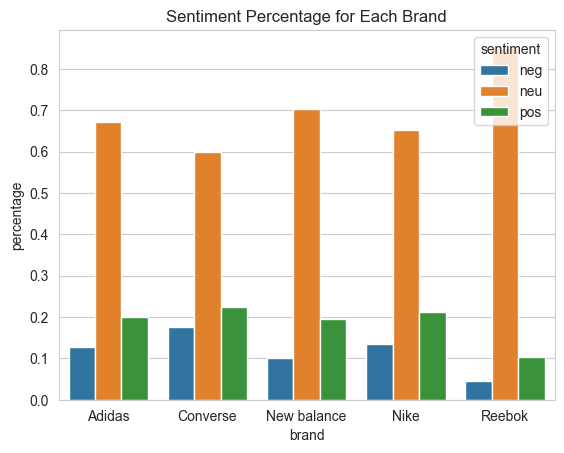

In [9]:
# visualize the above result 
sns.set_style('whitegrid')
ax = sns.barplot(data = brand_sentiment, x = 'brand',hue= 'sentiment', y = 'percentage')
ax.set_title('Sentiment Percentage for Each Brand')
# for container in ax.containers:
#     ax.bar_label(container)


In [10]:
# most positive 
brand_sentiment[brand_sentiment['sentiment'] == 'pos'].sort_values(by = 'percentage', ascending = False)

,brand,sentiment,percentage
5,Converse,pos,22.35%
11,Nike,pos,21.25%
2,Adidas,pos,19.95%
8,New balance,pos,19.59%
14,Reebok,pos,10.34%


In [11]:
# most negative 
brand_sentiment[brand_sentiment['sentiment'] == 'neg'].sort_values(by = 'percentage', ascending = False)

,brand,sentiment,percentage
3,Converse,neg,17.61%
9,Nike,neg,13.46%
0,Adidas,neg,12.76%
6,New balance,neg,10.14%
12,Reebok,neg,4.51%


## Brand Sentiment Over Time 

In [12]:
time = pd.read_csv('C:\\Users\\hs324\\OneDrive\\Desktop\\Class_Files\\06_2022Fall\\04_Practicum\\Quantilope_Core\\data\\brands_w_m3gender_region_nov10.csv',index_col=[0] )
time= time[['text','created_at','retweets','likes']].reset_index().drop(columns = 'author_id')
time.head()

,text,created_at,retweets,likes
0,Adidas Titans-John Ramsey launches a double to...,2022-08-01 00:10:04+00:00,3,9
1,Just never buy adidas shoes anymore,2022-08-01 01:00:19+00:00,0,0
2,"I like Adidas, nice company.",2022-08-01 01:09:12+00:00,0,0
3,As an unbiased youth sports fan. I am once aga...,2022-08-01 01:32:25+00:00,0,1
4,2 and a half hours until adidas sandals August,2022-08-01 01:34:39+00:00,0,0


In [13]:
# merge the three columns back to the df 
df_time = df.merge(time, how = 'inner', on= 'text')

# only keep the date 
df_time['created_at']= pd.to_datetime(df_time['created_at']).dt.date

df_time

,neg,neu,pos,text,sentiment,brand,created_at,retweets,likes
0,0.87%,93.31%,5.82%,Adidas Titans-John Ramsey launches a double to...,neu,Adidas,2022-08-01,3,9
1,75.41%,22.67%,1.91%,Just never buy adidas shoes anymore,neg,Adidas,2022-08-01,0,0
2,0.30%,3.04%,96.66%,"I like Adidas, nice company.",pos,Adidas,2022-08-01,0,0
3,27.34%,60.40%,12.26%,As an unbiased youth sports fan. I am once aga...,neu,Adidas,2022-08-01,0,1
4,1.08%,88.12%,10.80%,2 and a half hours until adidas sandals August,neu,Adidas,2022-08-01,0,0
...,...,...,...,...,...,...,...,...,...
17730,27.11%,68.58%,4.31%,Drinking The Paoli Massacre by Artillery Brew...,neu,NaN,2022-10-06,0,0
17731,73.25%,23.57%,3.18%,"I met a boy wearing Vans, 501's\nAnd a dope Be...",neg,NaN,2022-10-06,0,0
17732,10.52%,79.49%,9.99%,@InaGaddaDeVida Look at vans stack forms! http...,neu,NaN,2022-10-06,0,2
17733,0.22%,1.51%,98.27%,@vans X @waltdisneyworld 👟\n✨ I got the opport...,pos,NaN,2022-10-06,0,1


In [14]:
# unpivot the original df_time for easier viz 
df_time_unpivot = df_time.melt(id_vars=['text','brand','created_at'], value_vars = ['neg','neu','pos'], 
                               var_name='sentiment', value_name='sentiment_score')# .set_index('created_at')

df_time_unpivot

,text,brand,created_at,sentiment,sentiment_score
0,Adidas Titans-John Ramsey launches a double to...,Adidas,2022-08-01,neg,0.87%
1,Just never buy adidas shoes anymore,Adidas,2022-08-01,neg,75.41%
2,"I like Adidas, nice company.",Adidas,2022-08-01,neg,0.30%
3,As an unbiased youth sports fan. I am once aga...,Adidas,2022-08-01,neg,27.34%
4,2 and a half hours until adidas sandals August,Adidas,2022-08-01,neg,1.08%
...,...,...,...,...,...
53200,Drinking The Paoli Massacre by Artillery Brew...,NaN,2022-10-06,pos,4.31%
53201,"I met a boy wearing Vans, 501's\nAnd a dope Be...",NaN,2022-10-06,pos,3.18%
53202,@InaGaddaDeVida Look at vans stack forms! http...,NaN,2022-10-06,pos,9.99%
53203,@vans X @waltdisneyworld 👟\n✨ I got the opport...,NaN,2022-10-06,pos,98.27%


In [15]:
# viz using plotly.express
import plotly.graph_objs as go
from datetime import datetime
import plotly.express as px
import matplotlib as plt
import seaborn as sns
import pandas as pd
import numpy as np 
import plotly.io as pio
pio.renderers.default = "vscode"

Seaborn relplot reference : [Link](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot)

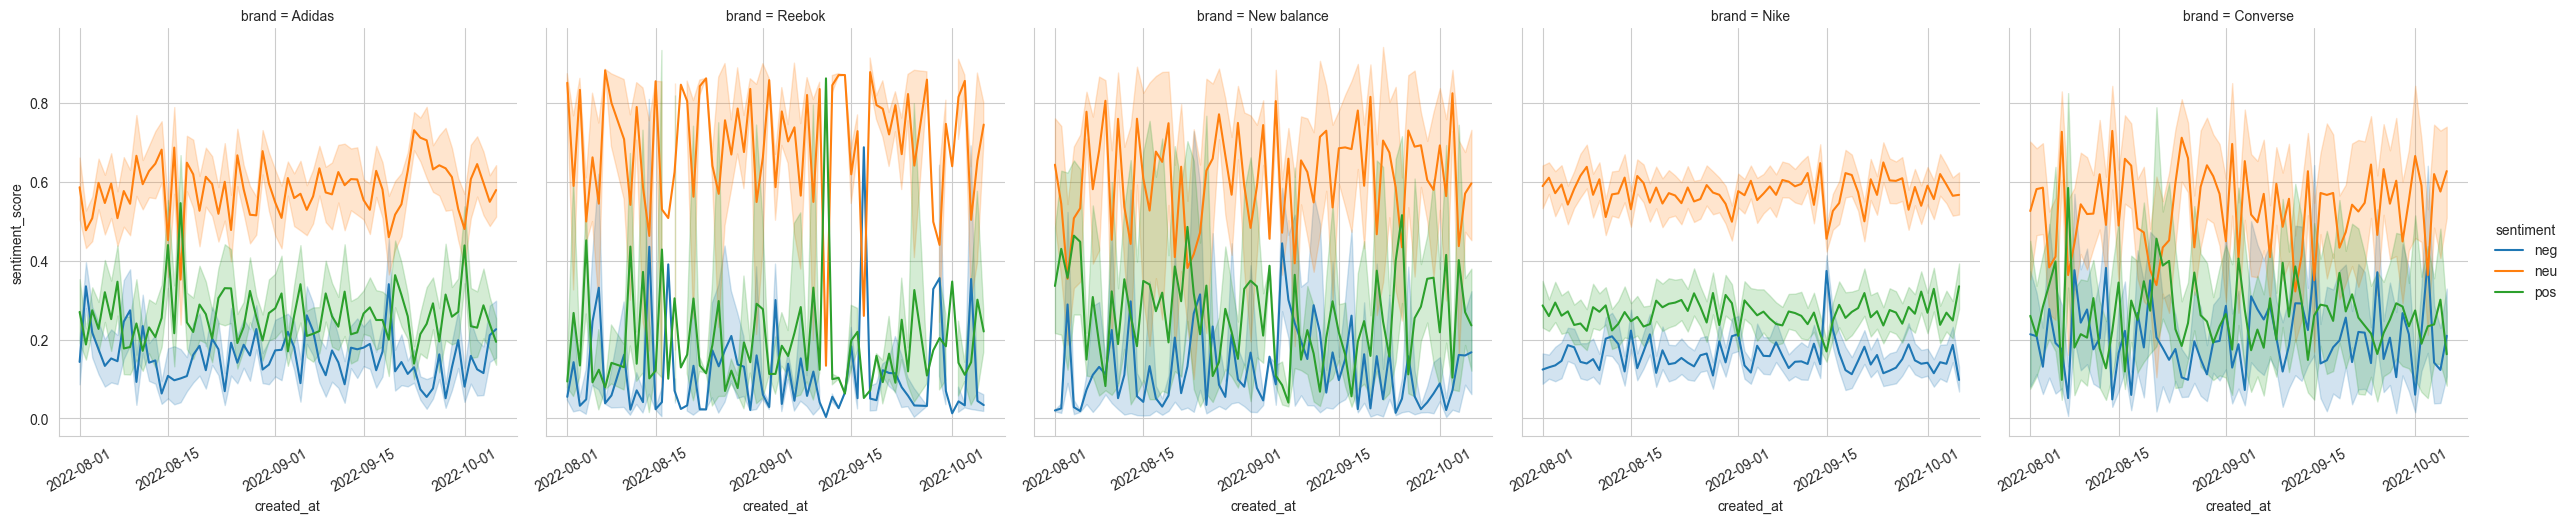

In [16]:
g = sns.relplot(
    data=df_time_unpivot, x="created_at", y="sentiment_score", col="brand",
    hue="sentiment", kind="line",
)

g.set_xticklabels(rotation=30)

In [ ]:
# get smoother result in weekly terms 
